# Customer Churn Analysis

Predicting customer churn holds significant importance for telecommunications companies, as it enables them to proactively retain their customer base. Retaining existing customers is more cost-effective than acquiring new ones, prompting major telecommunications firms to explore the development of predictive models that can identify customers at a higher risk of churning and implement targeted strategies to address the issue.

In this project, we are going to deep dive into customer churn analysis and creating machine learning using python.

## Data Exploration

The data set used in this article is available in the Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/Users/naufal/Documents/college thingz/MSIB/PROJECT 1/archive 2/Telco_customer_churn.csv')

In [3]:
data.shape

(7043, 33)

The data has 33 column and 7043 rows

In [4]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

Since we were analysing the churn, that mean churn feature is gonna be our dependent variable that we gonna analyzes and predict using another variable

In [5]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

This shows data type of each column. There are a anomalies that i found which is Total Charges having "object" as data type instead of float because based on the data.head() we see that Total Charges is numerical data. We'll fixed it up during data preprocessing

In [7]:
data.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Here we're checking whether there is a missing value, which turns out there is some missing value in the "Churn Reason" that we'll take care of it in the data preparation

## Data Preparation
#### A. Handiling missing value

In [8]:
data['Churn Reason'] = data['Churn Reason'].fillna("Non")

Since if we take a look of the initial data, there are 2 types of customer which is the one who churn and not. So customer that not churning does not have any Churn Reason, so we could basically fill the missing value a.k.a the reason with "NaN" using Pandas fillna method (https://pandas.pydata.org/docs/user_guide/missing_data.html) 

In [9]:
print(data)

      CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
7038  2569-WGERO      1  United States  California       Landers     92285   
7039  6840-RESVB      1  United States  California      Adelanto     92301   
7040  2234-XADUH      1  United States  California         Amboy     92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK      1  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender  ..

In [10]:
data[data['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [11]:
data.dropna(inplace=True)

Okay! now since the output from the checking missing value is 0 that means there is no column that has missing value anymore

#### B. Handling wrong data types

In [12]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [13]:
for column in data:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: CustomerID - Unique Values: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Column: Count - Unique Values: [1]
Column: Country - Unique Values: ['United States']
Column: State - Unique Values: ['California']
Column: City - Unique Values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Column: Zip Code - Unique Values: [90003 90005 90006 ... 96128 96134 96146]
Column: Lat Long - Unique Values: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Column: Latitude - Unique Values: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Column: Longitude - Unique Values: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Column: Gender - Unique Values: ['Male' 'Female']
Column: Senior Citizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['No' 

### Step 5. Exploratory Data Analysis

#### A. Distribution of Target Analysis

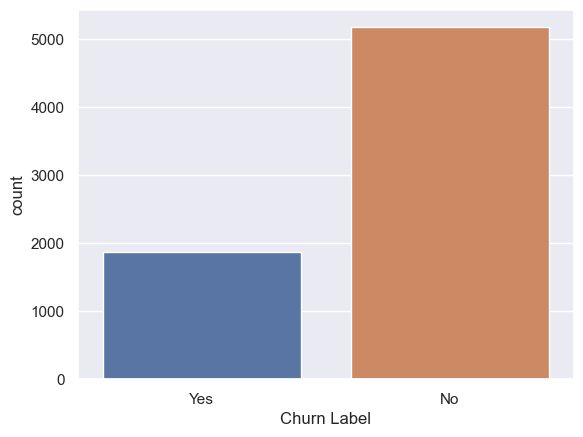

In [14]:
df = data
sns.countplot(x ='Churn Label', data = df)
plt.show()

This shows that the distribution between the positive class (Yes) and negative class (No) is imbalence, which could lead in poor performing model. This might requires some upsampling or downsampling

#### B. Distribution of Independence Variable

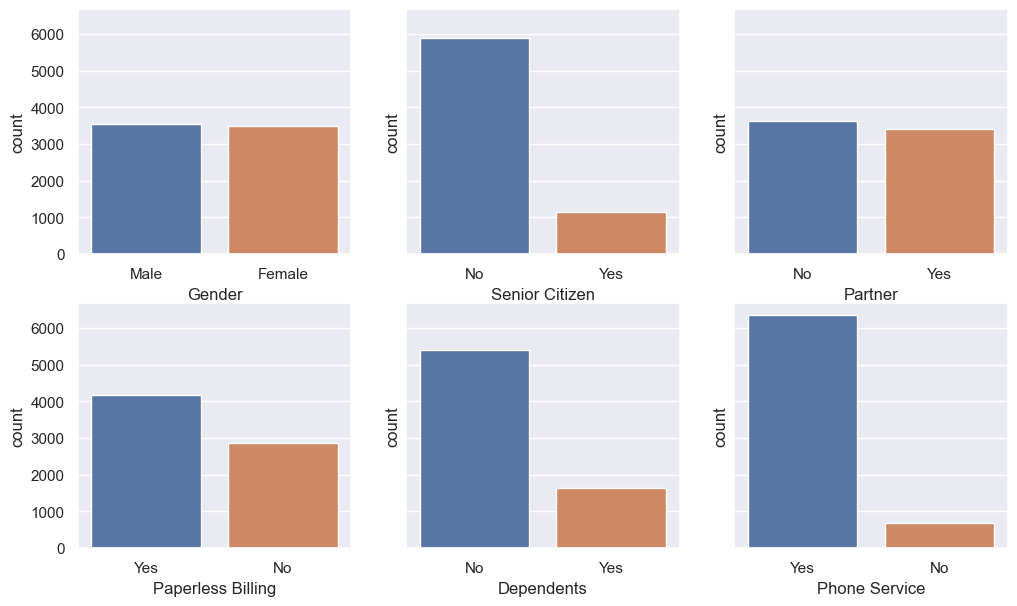

In [15]:

fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True) 
# This line of code is creating a subplot grid for multiple plots using the subplots function from Matplotlib.
sns.countplot(x="Gender", data=df, ax=axes[0, 0])
sns.countplot(x="Senior Citizen", data=df, ax=axes[0, 1])
sns.countplot(x="Partner", data=df, ax=axes[0, 2])
sns.countplot(x="Paperless Billing", data=df, ax=axes[1, 0])
sns.countplot(x="Dependents", data=df, ax=axes[1, 1])
sns.countplot(x="Phone Service", data=df, ax=axes[1, 2])

plt.show()

There's a high imbalance in Senior Citizen, Dependents, and Phone services

<Axes: xlabel='Internet Service', ylabel='count'>

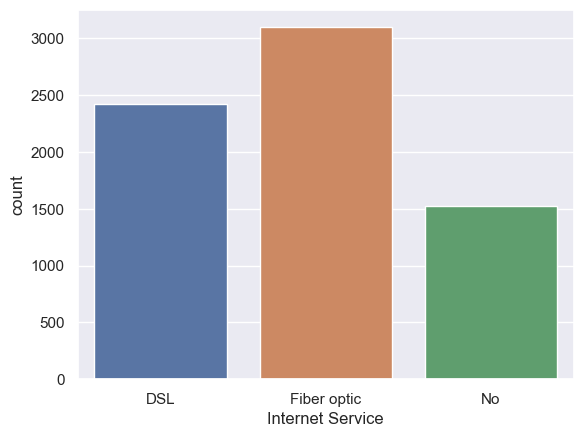

In [16]:
sns.countplot(x="Internet Service", data = df)

Its seems that Majority of customer use fiber optic internet service and some other use DSL but there's still who havent got the internet service

<Axes: xlabel='Online Security', ylabel='count'>

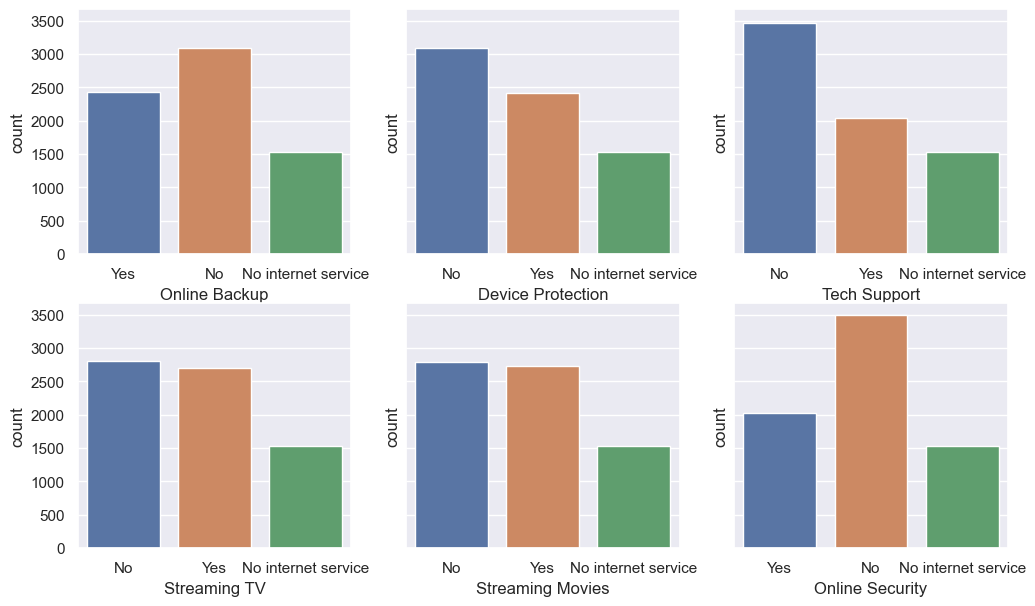

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True) 
# This line of code is creating a subplot grid for multiple plots using the subplots function from Matplotlib.
sns.countplot(x="Online Backup", data=df, ax=axes[0, 0])
sns.countplot(x="Device Protection", data=df, ax=axes[0, 1])
sns.countplot(x="Tech Support", data=df, ax=axes[0, 2])
sns.countplot(x="Streaming TV", data=df, ax=axes[1, 0])
sns.countplot(x="Streaming Movies", data=df, ax=axes[1, 1])
sns.countplot(x="Online Security", data=df, ax=axes[1, 2])

There's a commonality between these variable, which is "No Internet Services" meaning that when selecting features for machine learning model or analyzing the data, it's essential to recognize that these 6 features are meaningful only for customers who have internet service. For customers without internet service, these features are irrelevant because they are automatically categorized as no Internet service rather than got categorized to yes or no.

<Axes: xlabel='Payment Method', ylabel='count'>

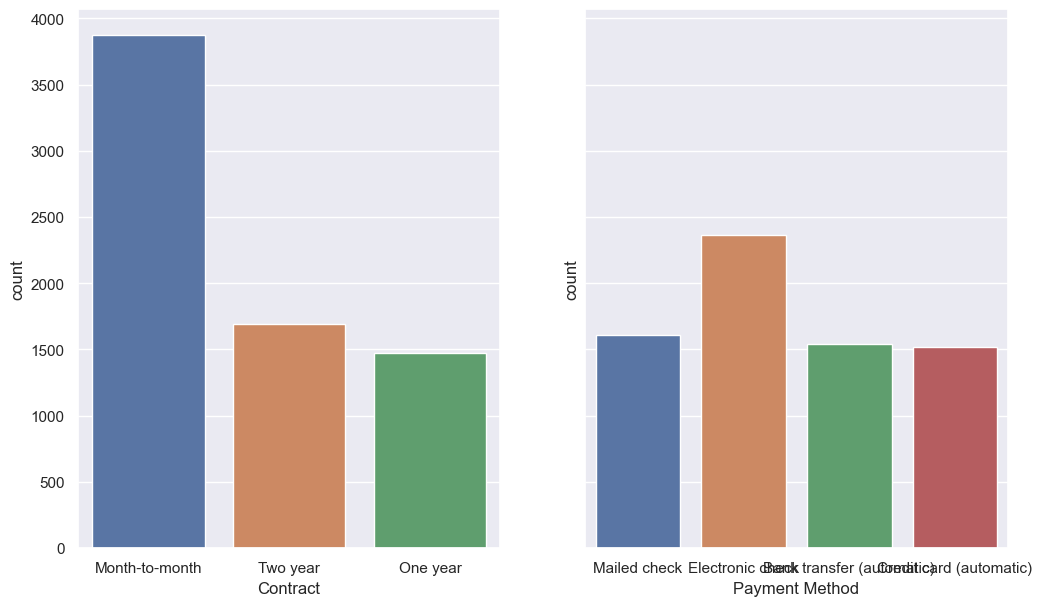

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True) 
sns.countplot(x="Contract", data=df, ax=axes[0])
sns.countplot(x="Payment Method", data=df, ax=axes[1])

Most of the customer seems to choose month-to-month contract and majority seems to use electronic check as a payment mentods

<Axes: xlabel='Monthly Charges', ylabel='Count'>

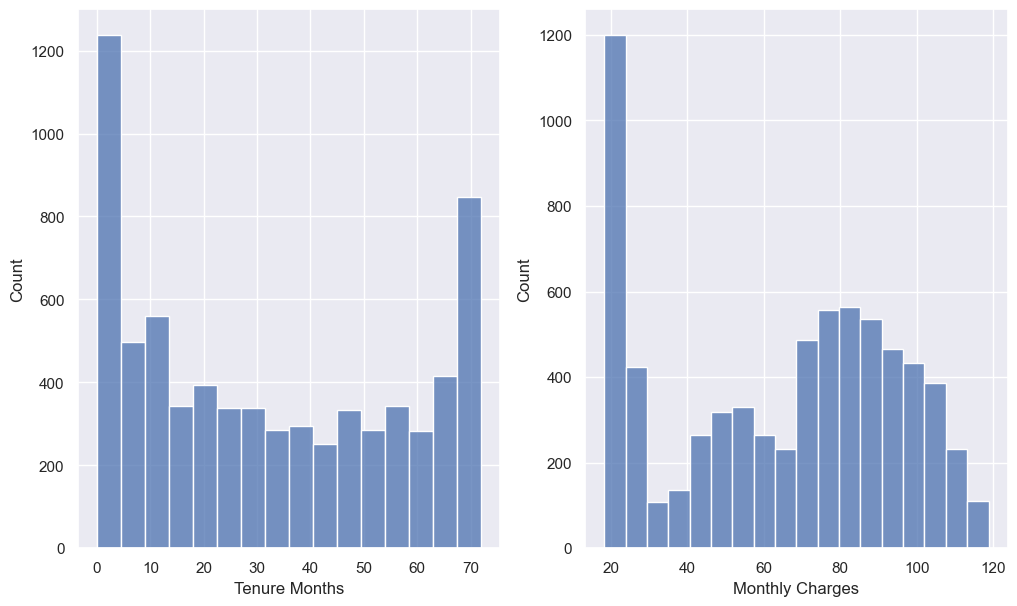

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.histplot(df["Tenure Months"], ax=axes[0])
sns.histplot(df["Monthly Charges"], ax=axes[1])

as Tenure in Months indicates the total amount of months that the customer has been with the company by the end of the quarter it seems that the customer loyalty is pretty high and there's also a surge of newcomers customer meaning that the company past program succeed to attract new customer and still could mantain the customer loyalty.

Monthly Charge Indicates the customer’s current total monthly charge for all their services from the company and most of the customer charges were the most low charges meaning that the company probably offers a good monthly deals and a reasonable price for their products.

In [20]:
data.drop(columns='CustomerID', inplace=True)
data.drop(columns='Country', inplace=True)
data.drop(columns='State', inplace=True)
data.drop(columns='City', inplace=True)
data.drop(columns='Zip Code', inplace=True)
data.drop(columns='Latitude', inplace=True)
data.drop(columns='Longitude', inplace=True)
data.drop(columns='Lat Long', inplace=True)
data.drop(columns='Churn Reason', inplace=True)
data.drop(columns='Count', inplace=True)
data.drop(columns='Senior Citizen', inplace=True)
data.dropna(inplace=True)

### Feature importance

In [21]:
from sklearn.metrics import mutual_info_score
# Function that computes the mutual information score between a categorical series and the column 'Churn Label'
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, data['Churn Label'])

In [22]:
# Select categorical variables excluding the response variable 
categorical_variables = data.select_dtypes(include=object).drop(['Churn Label'], axis=1)

In [23]:
# Compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

In [24]:
# visualize feature importance
print(feature_importance)

Contract             0.098182
Online Security      0.064528
Tech Support         0.062873
Internet Service     0.055394
Online Backup        0.046659
Payment Method       0.044423
Device Protection    0.043784
Dependents           0.037613
Streaming Movies     0.031918
Streaming TV         0.031803
Paperless Billing    0.019119
Partner              0.011383
Multiple Lines       0.000798
Phone Service        0.000069
Gender               0.000037
dtype: float64


Mutual information measures the mutual dependency between two variables based on entropy estimations. Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target.

As shown above, gender, Phone Service, Country, state, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target.

### Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model.

In [25]:
df_telco_transformed = data.copy()

In [26]:
# label encoding (binary variables)
label_encoding_columns = ['Gender', 'Partner', 'Dependents', 'Paperless Billing', 'Phone Service', 'Churn Label', ]

In [27]:
# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'Gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

### One-Hot Encoding

One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data.

In [28]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
                            'Tech Support', 'Streaming TV',  'Streaming Movies', 'Contract', 'Payment Method']

In [29]:
# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns=one_hot_encoding_columns)

### Normalization

Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

In [30]:
# min-max normalization (numeric variables)
min_max_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges']

In [31]:
# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   

### Splitting the data in training and testing sets

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. 

In [32]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn Label')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn Label']
# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['Gender', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment 

In [33]:
# split the data in training and testing sets
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

### Assessing multiple algorithms

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

In [37]:
# create a list with all the algorithms we are going to assess
models = create_models()

In [38]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7468714448236633)
Classifier: k_nearest_neighbors, Accuracy: 0.8555176336746303)
Classifier: logistic_regression, Accuracy: 1.0)


/Users/naufal/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: support_vector_machines, Accuracy: 0.7468714448236633)
Classifier: random_forest, Accuracy: 1.0)
Classifier: gradient_boosting, Accuracy: 1.0)
